# Generate decay with long lived intermediate particle

In [1]:
import sys
import numpy as np
sys.path.append('../')
import jax.random as rjax
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 14})

In [2]:
from helixgen.phspdecay import generate
from helixgen.helix import Helix, cartesian_to_helix

/home/vitaly/miniconda3/envs/tf2/lib/python3.8/site-packages/jax/lib/xla_bridge.py:125: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


In [3]:
rng = rjax.PRNGKey(seed=1)

In [4]:
weights, genpcls = generate(rng, '', 10000)

In [5]:
weights[:10]

DeviceArray([0.09306892, 0.09065719, 0.07718312, 0.07957099, 0.08724537,
             0.08999224, 0.09180951, 0.0920288 , 0.02879681, 0.04726308],            dtype=float32)

In [6]:
type(genpcls)

dict

In [7]:
genpcls.keys()

dict_keys(['pi+_Ks0', 'pi-_Ks0', 'Ks0', 'pi+', 'pi-'])

In [8]:
type(genpcls['Ks0'])

dict

In [9]:
genpcls['Ks0'].keys()

dict_keys(['pcl', 'mom', 'pos'])

In [10]:
type(genpcls['Ks0']['pos'])

helixgen.cartesian.Position

Let's look at generated $K_S^0$ positions

In [11]:
r_ks = genpcls['Ks0']['pos']

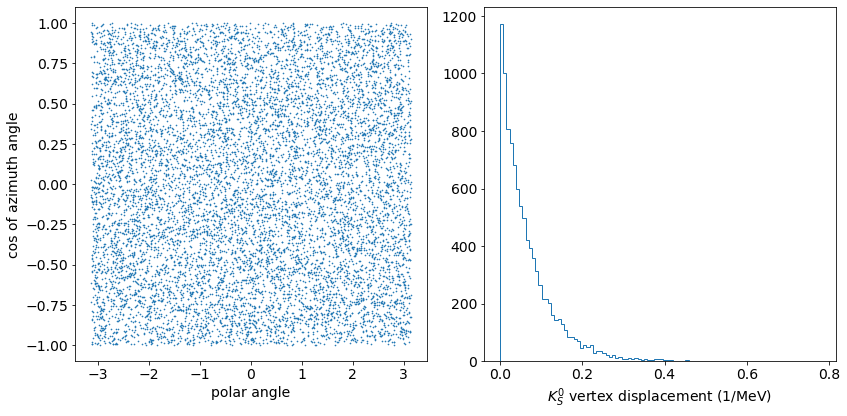

In [12]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 6))
ax[0].scatter(r_ks.phi, r_ks.costh, s=0.4);
ax[0].set_xlabel('polar angle')
ax[0].set_ylabel('cos of azimuth angle')
ax[1].hist(r_ks.r, bins=100, histtype='step');
ax[1].set_xlabel(r'$K_S^0$ vertex displacement (1/MeV)')
fig.tight_layout()

The average $K_S^0$ vertex displacement

In [13]:
r_ks.r.mean()

DeviceArray(0.06712151, dtype=float32)

Translate vertex displacement to the decay time

In [14]:
ks_mom = genpcls['Ks0']['mom']
ks_mass = genpcls['Ks0']['pcl'].mass

In [15]:
ks_time = r_ks.r / ks_mom.vtot(ks_mass)
ks_time.shape

(10000,)

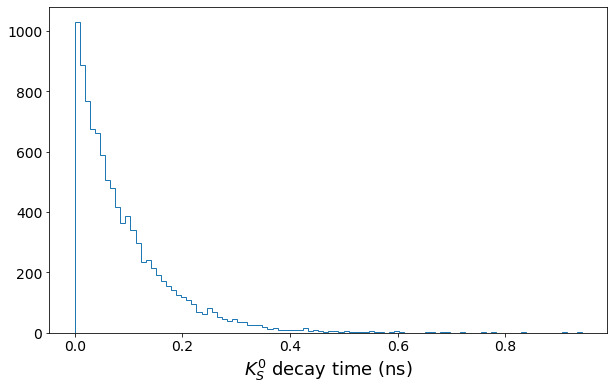

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(ks_time, bins=100, histtype='step');
ax.set_xlabel(r'$K_S^0$ decay time (ns)', fontsize=18);

In [17]:
ks_time.mean()

DeviceArray(0.09057117, dtype=float32)

Same distributions in the cartesian representation

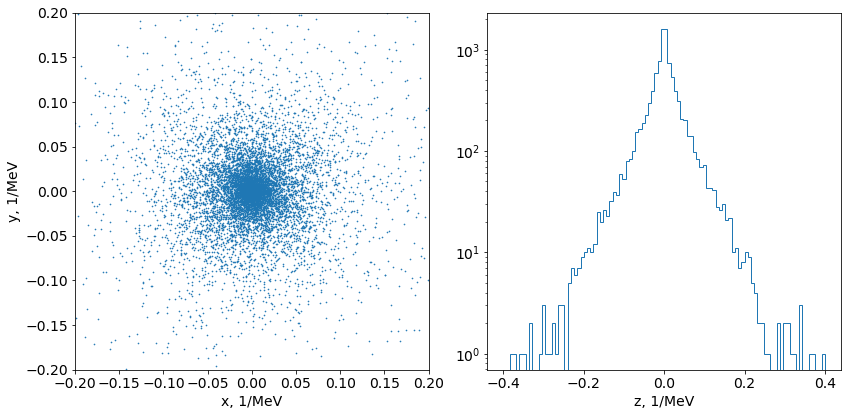

In [18]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 6))
ax[0].scatter(r_ks.x, r_ks.y, s=0.4);
ax[0].set_xlabel('x, 1/MeV')
ax[0].set_ylabel('y, 1/MeV')
ax[0].set_xlim([-0.2, 0.2])
ax[0].set_ylim([-0.2, 0.2])
ax[1].hist(r_ks.z, bins=100, histtype='step', range=(-0.4, 0.4));
ax[1].set_xlabel('z, 1/MeV')
ax[1].semilogy()
fig.tight_layout()

## Spatial resolution check

In [19]:
pip = genpcls['pi+_Ks0']

In [20]:
pip.keys()

dict_keys(['pcl', 'mom', 'pos', 'hel', 'helcov', 'meas_pos', 'meas_mom'])

In [21]:
pip_pos = pip['pos']
pip_meas_pos = pip['meas_pos']

In [22]:
pip_pos_offset = pip_meas_pos - pip_pos

In [23]:
type(pip_pos_offset)

helixgen.cartesian.Position

In [24]:
pip_pos_offset.size

10000

In [25]:
pip_pos.r.mean(), pip_pos_offset.r.mean()

(DeviceArray(0.06712151, dtype=float32), DeviceArray(0.1340818, dtype=float32))

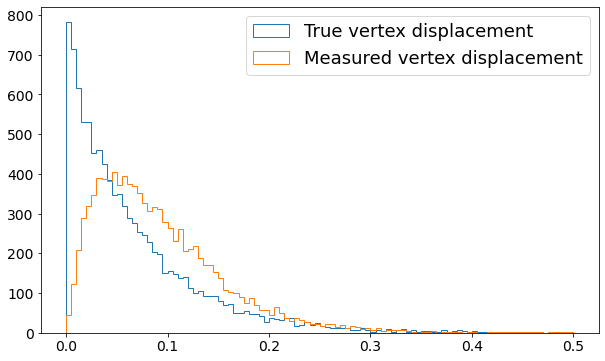

In [26]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(pip_pos.r, bins=100, histtype='step', range=(0, .5), label='True vertex displacement');
ax.hist(pip_meas_pos.r, bins=100, histtype='step', range=(0, .5), label='Measured vertex displacement');
# ax.hist(pip_pos_offset.r, bins=100, histtype='step', range=(0, .5), label='Vertex measurement offset');
ax.legend(fontsize=18);

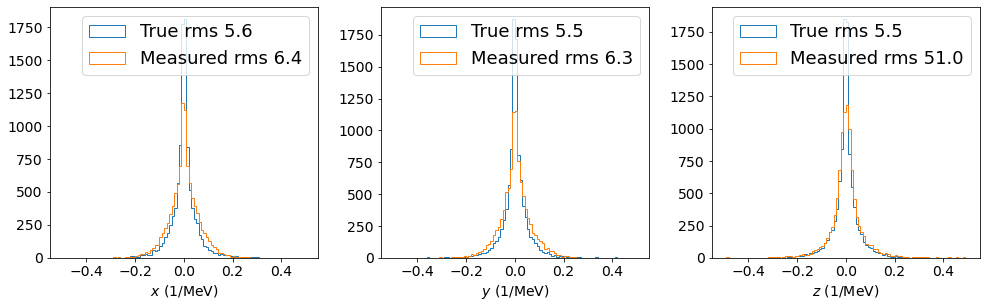

In [27]:
fig, ax = plt.subplots(ncols=3, figsize=(14, 4.5))
maxlav = 0.5

ax[0].hist(pip_pos.x, bins=100, histtype='step', range=(-maxlav, maxlav),
           label=f'True rms {100*pip_pos.x.std():.1f}');
ax[0].hist(pip_meas_pos.x, bins=100, histtype='step', range=(-maxlav, maxlav),
           label=f'Measured rms {100*pip_meas_pos.x.std():.1f}');
ax[0].set_xlabel(r'$x$ (1/MeV)', fontsize=14)
ax[0].legend(fontsize=18)

ax[1].hist(pip_pos.y, bins=100, histtype='step', range=(-maxlav, maxlav),
           label=f'True rms {100*pip_pos.y.std():.1f}');
ax[1].hist(pip_meas_pos.y, bins=100, histtype='step', range=(-maxlav, maxlav),
           label=f'Measured rms {100*pip_meas_pos.y.std():.1f}');
ax[1].set_xlabel(r'$y$ (1/MeV)', fontsize=14)
ax[1].legend(fontsize=18)

ax[2].hist(pip_pos.z, bins=100, histtype='step', range=(-maxlav, maxlav),
           label=f'True rms {100*pip_pos.z.std():.1f}');
ax[2].hist(pip_meas_pos.z, bins=100, histtype='step', range=(-maxlav, maxlav),
           label=f'Measured rms {100*pip_meas_pos.z.std():.1f}');
ax[2].set_xlabel(r'$z$ (1/MeV)', fontsize=14)
ax[2].legend(fontsize=18)

fig.tight_layout()

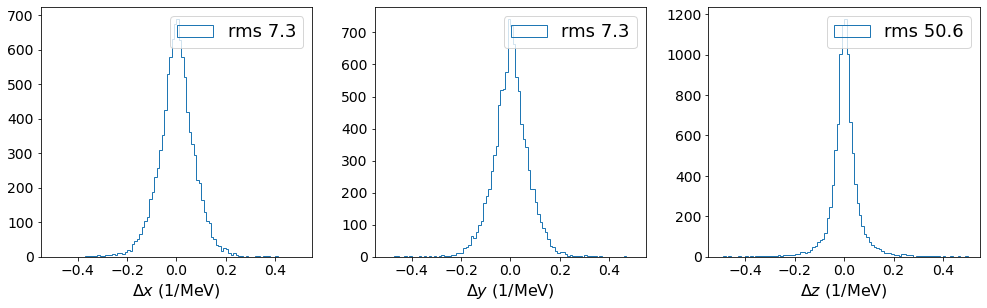

In [28]:
fig, ax = plt.subplots(ncols=3, figsize=(14, 4.5))
maxlav = 0.5
mult = 100

dx = pip_meas_pos.x - pip_pos.x
ax[0].hist(dx, bins=100, histtype='step', range=(-maxlav, maxlav), label=f'rms {mult*dx.std():.1f}');
ax[0].set_xlabel(r'$\Delta x$ (1/MeV)', fontsize=16)
ax[0].legend(fontsize=18)

dy = pip_meas_pos.y - pip_pos.y
ax[1].hist(dy, bins=100, histtype='step', range=(-maxlav, maxlav), label=f'rms {mult*dy.std():.1f}');
ax[1].set_xlabel(r'$\Delta y$ (1/MeV)', fontsize=16)
ax[1].legend(fontsize=18)

dz = pip_meas_pos.z - pip_pos.z
ax[2].hist(dz, bins=100, histtype='step', range=(-maxlav, maxlav), label=f'rms {mult*dz.std():.1f}');
ax[2].set_xlabel(r'$\Delta z$ (1/MeV)', fontsize=16)
ax[2].legend(fontsize=18)

fig.tight_layout()

In [29]:
pip_meas_pos.z.max(), pip_meas_pos.z.min()

(17.18518214213393, -12.940423434034631)

In [30]:
pip_pos.z.max(), pip_pos.z.min()

(DeviceArray(0.45455453, dtype=float32),
 DeviceArray(-0.7652745, dtype=float32))

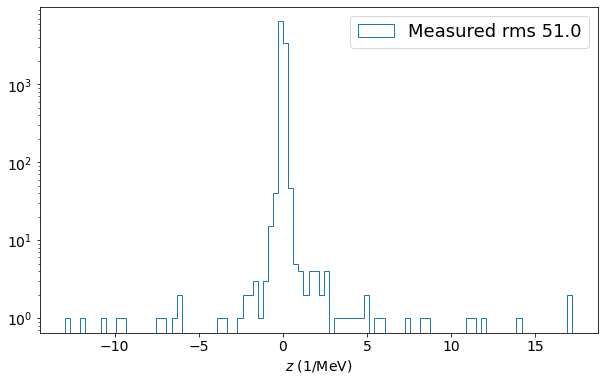

In [31]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(pip_meas_pos.z, bins=100, histtype='step',
           label=f'Measured rms {100*pip_meas_pos.z.std():.1f}');
ax.set_xlabel(r'$z$ (1/MeV)', fontsize=14)
ax.semilogy()
ax.legend(fontsize=18);

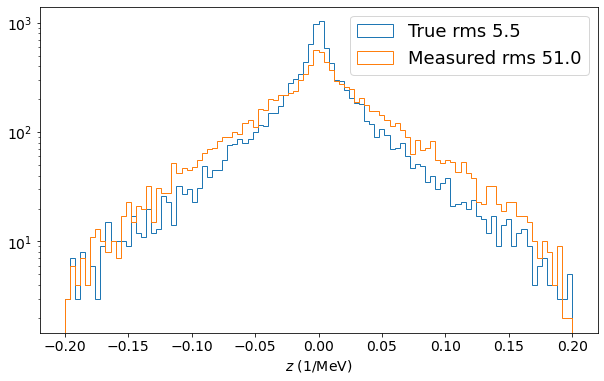

In [32]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(pip_pos.z, bins=100, histtype='step', range=(-0.2, 0.2),
           label=f'True rms {100*pip_pos.z.std():.1f}');
ax.hist(pip_meas_pos.y, bins=100, histtype='step', range=(-0.2, 0.2),
           label=f'Measured rms {100*pip_meas_pos.z.std():.1f}');
ax.set_xlabel(r'$z$ (1/MeV)', fontsize=14)
ax.semilogy()
ax.legend(fontsize=18);

## Momentum resolution

In [33]:
pip_mom = pip['mom']
pip_meas_mom = pip['meas_mom']

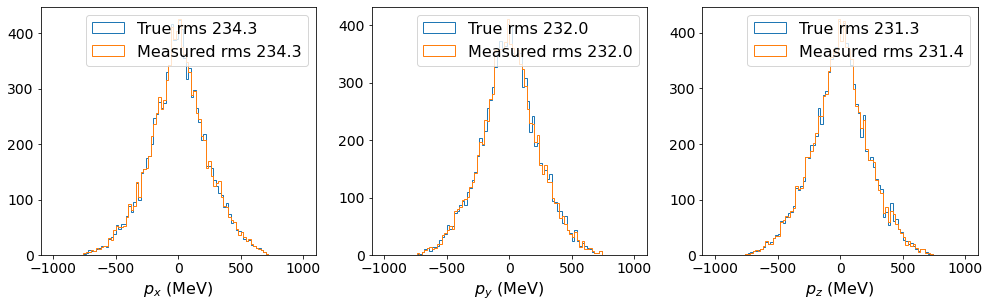

In [34]:
fig, ax = plt.subplots(ncols=3, figsize=(14, 4.5))
maxlav = 1000
mult = 1

ax[0].hist(pip_mom.px, bins=100, histtype='step', range=(-maxlav, maxlav),
           label=f'True rms {mult*pip_mom.px.std():.1f}');
ax[0].hist(pip_meas_mom.px, bins=100, histtype='step', range=(-maxlav, maxlav),
           label=f'Measured rms {mult*pip_meas_mom.px.std():.1f}');
ax[0].set_xlabel(r'$p_x$ (MeV)', fontsize=16)
ax[0].legend(fontsize=16)

ax[1].hist(pip_mom.py, bins=100, histtype='step', range=(-maxlav, maxlav),
           label=f'True rms {mult*pip_mom.py.std():.1f}');
ax[1].hist(pip_meas_mom.py, bins=100, histtype='step', range=(-maxlav, maxlav),
           label=f'Measured rms {mult*pip_meas_mom.py.std():.1f}');
ax[1].set_xlabel(r'$p_y$ (MeV)', fontsize=16)
ax[1].legend(fontsize=16)

ax[2].hist(pip_mom.pz, bins=100, histtype='step', range=(-maxlav, maxlav),
           label=f'True rms {mult*pip_mom.pz.std():.1f}');
ax[2].hist(pip_meas_mom.pz, bins=100, histtype='step', range=(-maxlav, maxlav),
           label=f'Measured rms {mult*pip_meas_mom.pz.std():.1f}');
ax[2].set_xlabel(r'$p_z$ (MeV)', fontsize=16)
ax[2].legend(fontsize=16)

fig.tight_layout()

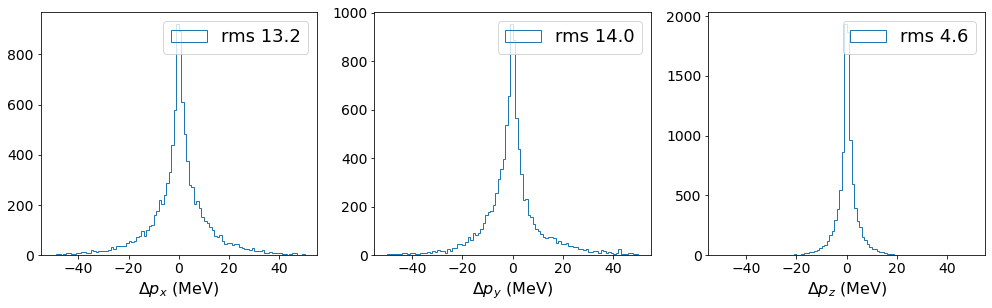

In [35]:
fig, ax = plt.subplots(ncols=3, figsize=(14, 4.5))
maxlav = 50
mult = 1

dpx = pip_meas_mom.px - pip_mom.px
ax[0].hist(dpx, bins=100, histtype='step', range=(-maxlav, maxlav), label=f'rms {mult*dpx.std():.1f}');
ax[0].set_xlabel(r'$\Delta p_x$ (MeV)', fontsize=16)
ax[0].legend(fontsize=18)

dpy = pip_meas_mom.py - pip_mom.py
ax[1].hist(dpy, bins=100, histtype='step', range=(-maxlav, maxlav), label=f'rms {mult*dpy.std():.1f}');
ax[1].set_xlabel(r'$\Delta p_y$ (MeV)', fontsize=16)
ax[1].legend(fontsize=18)

dpz = pip_meas_mom.pz - pip_mom.pz
ax[2].hist(dpz, bins=100, histtype='step', range=(-maxlav, maxlav), label=f'rms {mult*dpz.std():.1f}');
ax[2].set_xlabel(r'$\Delta p_z$ (MeV)', fontsize=16)
ax[2].legend(fontsize=18)

fig.tight_layout()

## Helix parameters resolution

In [36]:
pip_hel = pip['hel']
pip_meas_mom = pip['meas_mom']
pip_meas_hel, l = cartesian_to_helix(pip_meas_pos, pip_meas_mom, 1, 1.5)
type(pip_meas_hel)

helixgen.helix.Helix

In [37]:
def plot_helix(ax, hel, diff=False):
    scl = 1. if not diff else 0.001
    ax[0,0].hist(hel.d0, bins=100, histtype='step', range=(-scl*0.3, scl*0.3), label=f'{100*hel.d0.std():.2f}')
    ax[0,0].set_xlabel(r'$d_0$', fontsize=17);
    ax[0,0].legend(fontsize=16)

    ax[0,1].hist(hel.phi0, bins=100, histtype='step', label=f'{hel.phi0.std():.2f}')
    ax[0,1].set_xlabel(r'$\phi_0$', fontsize=17);
    ax[0,1].legend(fontsize=16)

    ax[0,2].hist(hel.omega, bins=100, histtype='step', range=(0, scl*10),
                 label=f'{hel.omega.std():.2f}')
    ax[0,2].set_xlabel(r'$\omega$', fontsize=17);
    ax[0,2].legend(fontsize=16)

    ax[1,0].hist(hel.z0, bins=100, histtype='step', range=(-scl*0.3, scl*0.3),
                 label=f'{hel.z0.std():.2f}')
    ax[1,0].set_xlabel(r'$z_0$', fontsize=17);
    ax[1,0].legend(fontsize=16)

    ax[1,1].hist(hel.tanl, bins=100, histtype='step', range=(-scl*5, scl*5),
                 label=f'{hel.tanl.std():.2f}')
    ax[1,1].set_xlabel(r'$\tan{\lambda}$', fontsize=17);
    ax[1,1].legend(fontsize=16)

    ax[1,2].hist(hel.r, bins=100, histtype='step', range=(0, scl*4),
                 label=f'{hel.r.std():.2f}')
    ax[1,2].set_xlabel(r'$r$', fontsize=17);
    ax[1,2].legend(fontsize=16)

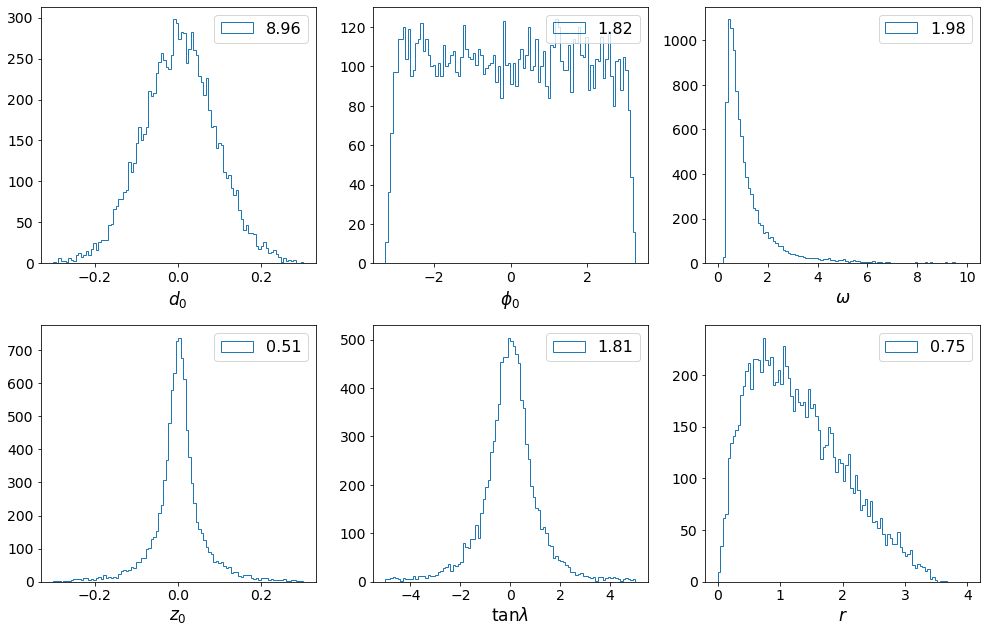

In [38]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(14, 9))
plot_helix(ax, pip_hel)
fig.tight_layout()

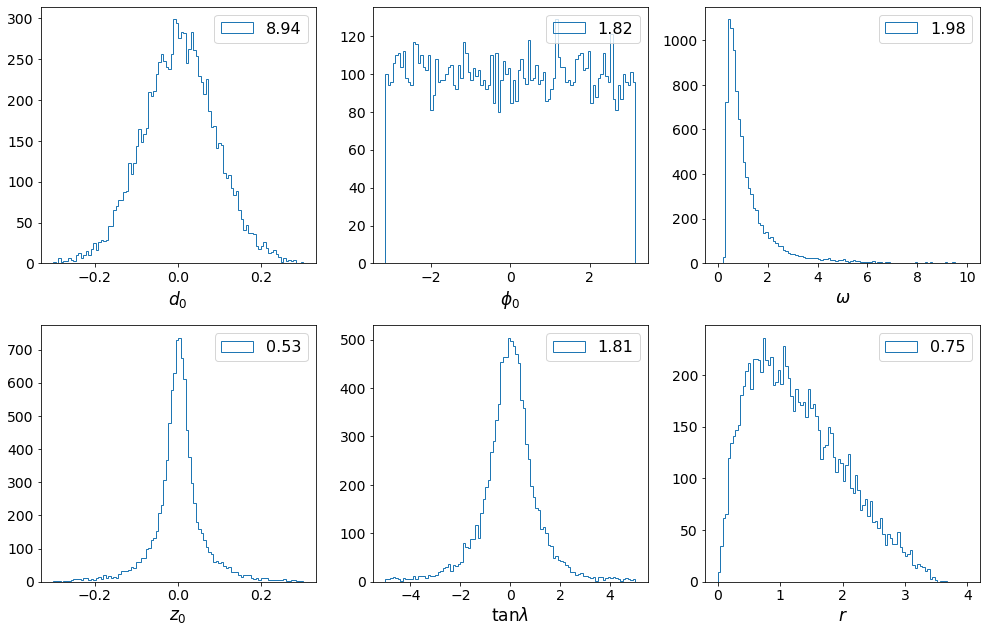

In [39]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(14, 9))
plot_helix(ax, pip_meas_hel)
fig.tight_layout()

In [40]:
pip_dhel = Helix.from_ndarray(pip_meas_hel.as_array - pip_hel.as_array)

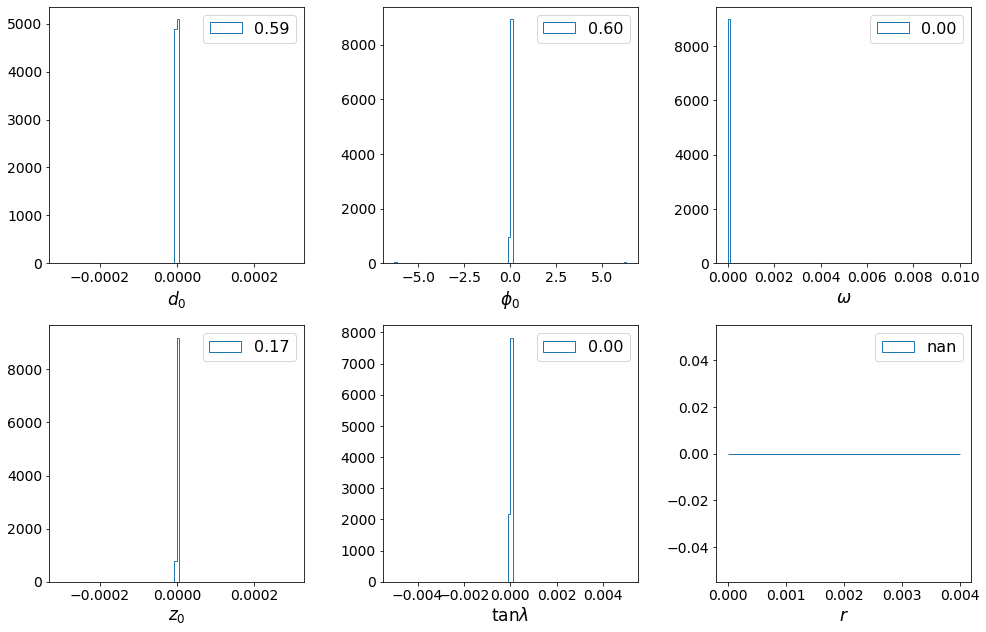

In [41]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(14, 9))
plot_helix(ax, pip_dhel, True)
fig.tight_layout()